## Test GPU / CPU Devices available

In [1]:
import tensorflow
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18011585062787882215
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17225001540961547491
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

## Import code from Drive Folders

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
! ls

Mounted at /content/drive
drive  sample_data


In [4]:
import os 

# os.chdir("/content/drive/My Drive/Colab Notebooks/Retinal_Image_Analysis Project (1)/code_SineNet")
os.chdir("/content/drive/My Drive/Colab Notebooks/Retinal_Image_Analysis Project/code_SineNet")
!ls

01_test_mask.gif    main.py			   sine_net
augmentation.py     metrics.py			   Sine_net_colab.ipynb
checkpoint	    outputs			   sinenet_torch_BN.py
configuration.txt   plain_class_weights2_ensemble  sinenet_torch_model.py
denoising.png	    pr_curve.png		   sine_predict.py
ensemble2.py	    precision_recall_curve.png	   sine_train.py
ensemble.py	    prediction_keras.py		   test_all_plain
extract_patches.py  prediction_sn.py		   training2.py
help_functions.py   pred_result.png		   training_datagen.py
history.json	    preprocessing.py		   Untitled0.ipynb
image_distrib.png   __pycache__			   weighted_linedetector.py
linedetected.png    roc_after.png		   weights_best.hdf5
lisk_predict.py     roc_curve.png		   zca.pickle
lisk_train.py	    scaler.npy
losses.py	    scaler.pickle


# Code Core

In [5]:
#!pip install torchvision

In [6]:
# !pip install scikit-learn==0.19.0

In [7]:
# ! pip3 install git+git://github.com/ufoym/imbalanced-dataset-sampler.git

In [8]:
%matplotlib notebook
%matplotlib inline

In [9]:
!pip3 install albumentations==1.0.0
# !pip install imageio
# !pip install --upgrade torch
# !pip install torchvision
!pip3 install --upgrade opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.3 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['/content/drive/My Drive/Colab Notebooks/Retinal_Image_Analysis Project/code_venv1', '/content/drive/My Drive/Colab Notebooks/Retinal_Image_Analysis Project/code_SineNet', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']
['/content/drive/My Drive/Colab Notebooks/Retinal_Image_Analysis Project/code_venv1', '../', '../', './lib/', '/content/drive/My Drive/Colab Notebooks/Retinal_Image_Analysis Project/code_venv1', '/content/drive/My Drive/Colab Notebooks/Retinal_Image_Analysis Project/code_SineNet', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']
0-Classifie

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


None
Check: final output of the network:
(None, 2)
Load Liskowski

(100000, 27, 27, 2)
Training begins...
 1


Epoch 1/2
782/782 [==============================] - ETA: 0s - loss: 0.5832 - tp: 42757.0000 - fp: 7243.0000 - tn: 42757.0000 - fn: 7243.0000 - accuracy: 0.8551 - precision: 0.8551 - recall: 0.8551 - auc: 0.8605 - prc: 0.8301
Epoch 1: val_loss improved from inf to 0.53209, saving model to weights_best.hdf5
782/782 [==============================] - 85s 90ms/step - loss: 0.5832 - tp: 42757.0000 - fp: 7243.0000 - tn: 42757.0000 - fn: 7243.0000 - accuracy: 0.8551 - precision: 0.8551 - recall: 0.8551 - auc: 0.8605 - prc: 0.8301 - val_loss: 0.5321 - val_tp: 43063.0000 - val_fp: 6937.0000 - val_tn: 43063.0000 - val_fn: 6937.0000 - val_accuracy: 0.8613 - val_precision: 0.8613 - val_recall: 0.8613 - val_auc: 0.8613 - val_prc: 0.8305 - lr: 0.0010
Epoch 2/2
782/782 [==============================] - ETA: 0s - loss: 0.5313 - tp: 43046.0000 - fp: 6954.0000 - tn: 43046.0000 - fn: 6954.0000 - accuracy: 0.8609 - precision: 0.8609 - recall: 0.8609 - auc: 0.8690 - prc: 0.8428
Epoch 2: val_loss improved

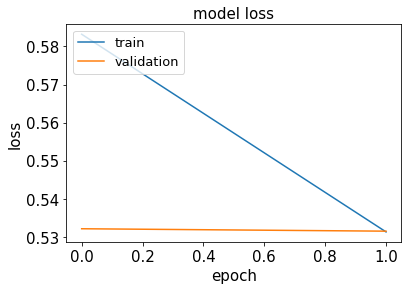

<Figure size 432x288 with 0 Axes>

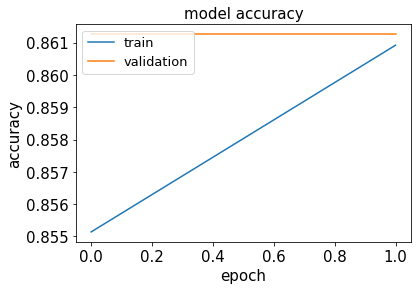

1
train done

Training begins...
 2


Epoch 1/2
340/782 [============>.................] - ETA: 34s - loss: 0.5306 - tp: 18651.0000 - fp: 3061.0000 - tn: 18651.0000 - fn: 3061.0000 - accuracy: 0.8590 - precision: 0.8590 - recall: 0.8590 - auc: 0.8720 - prc: 0.8478

In [ ]:
%run main.py